# Import the necessary Libraries


In [46]:
import pandas as pd
import numpy as np
import lime
import lime.lime_tabular
import matplotlib.pyplot as plt
import seaborn as sns

# Read the preprocessed data


In [47]:
preprocessed_data = pd.read_csv("preprocessed_data.csv")

In [48]:
preprocessed_data.head()

,Patient_ID,Pregncies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,0.738942,0.841697,0.079257,0.878673,-1.015223,0.174836,0.823401,1.362184,1
1,2,-0.815412,-1.101194,-0.293974,0.633136,-1.015223,-0.726206,-0.168910,0.124186,0
2,3,1.199867,1.983640,-0.414110,-1.432077,-1.015223,-1.130359,0.937118,0.227845,1
3,4,-0.815412,-0.983143,-0.293974,0.362290,0.849231,-0.537930,-1.302353,-1.480337,0
4,5,-2.025613,0.491042,-1.676657,0.878673,1.069805,1.479798,2.339558,0.324975,1


In [58]:
preprocessed_data.dtypes

Patient_ID                    int64
Pregncies                   float64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                         float64
Outcome                       int64
dtype: object

# Select the best features


# Evaluation metrics


In [49]:
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    recall_score,
    precision_score,
    f1_score,
    confusion_matrix,
)

In [50]:
def print_eval_scores(y_pred_train, y_pred_dev, y_train, y_dev):
    accuracy_score_val_train = accuracy_score(y_pred_train, y_train)
    accuracy_score_val_dev = accuracy_score(y_pred_dev, y_dev)

    print("Accuracy score on train set: ", accuracy_score_val_train)
    print("Accuracy score on dev set: ", accuracy_score_val_dev)

    recall_score_val_train = recall_score(y_pred_train, y_train)
    recall_score_val_dev = recall_score(y_pred_dev, y_dev)

    print("Recall score on train set: ", recall_score_val_train)
    print("Recall score on dev set: ", recall_score_val_dev)

    precision_score_val_train = precision_score(y_pred_train, y_train)
    precision_score_val_dev = precision_score(y_pred_dev, y_dev)

    print("Precision score on train set: ", precision_score_val_train)
    print("Precision score on dev set: ", precision_score_val_dev)

    f1_score_val_train = f1_score(y_pred_train, y_train)
    f1_score_val_dev = f1_score(y_pred_dev, y_dev)

    print("F1 score on train set: ", f1_score_val_train)
    print("F1 score on dev set: ", f1_score_val_dev)

    confusion_matrix_val_train = confusion_matrix(y_pred_train, y_train)
    confusion_matrix_val_dev = confusion_matrix(y_pred_dev, y_dev)

    print("Confusion matrix on train set:")
    print(confusion_matrix_val_train)
    print()

    print("Confusion matrix on dev set:")
    print(confusion_matrix_val_dev)
    print()

    classification_report_val_train = classification_report(y_pred_train, y_train)
    classification_report_val_dev = classification_report(y_pred_dev, y_dev)

    print("Classification report on train set:")
    print(classification_report_val_train)
    print()

    print("Classification report on dev set:")
    print(classification_report_val_dev)
    print()

# Split the data into train and test


In [51]:
from sklearn.model_selection import train_test_split

X = preprocessed_data.drop(["Patient_ID", "Outcome"], axis=1)
y = preprocessed_data["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# split it into train and dev set
X_train, X_dev, y_train, y_dev = train_test_split(X_train, y_train, test_size=0.2)

# check the shape of the train, dev and test set
X_train.shape, X_dev.shape, X_test.shape

((492, 8), (124, 8), (154, 8))

# Hyper-parameter tuning


## Note:


**We can use the following for the scoring**

accuracy: The fraction of predictions that are correct.

balanced_accuracy: The average of the recall and precision scores.

f1_score: The harmonic mean of the recall and precision scores.

log_loss: The cross-entropy loss.

mean_squared_error: The mean squared error.

mean_absolute_error: The mean absolute error.

mean_absolute_percentage_error: The mean absolute percentage error.

r2: The coefficient of determination.


**If we want to use any other scoring method, we have to implement the function ourselves.**


## Search by GridSearchCV


In [52]:
from sklearn.model_selection import GridSearchCV


def tune_by_GridSearchCV(
    model, param_grid, X_train, y_train, cross_val_folds=5, scoring_method="accuracy"
):
    grid_search = GridSearchCV(
        model,
        param_grid,
        cv=cross_val_folds,
        scoring=scoring_method,
        verbose=1,
    )

    grid_search.fit(X_train, y_train)

    print("Best parameters: ", grid_search.best_params_)
    print("Best score: ", grid_search.best_score_)

    # print()
    # print("The results of the Grid Search CV:")
    # print(grid_search.cv_results_)
    # print()

    # Returns the best predicted model
    return grid_search.best_estimator_

## Search by RandomizedSearchCV


In [53]:
from sklearn.model_selection import RandomizedSearchCV


def tune_by_RandomizedSearchCV(
    model, param_grid, X_train, y_train, cross_val_folds=5, scoring_method="accuracy"
):
    random_search = RandomizedSearchCV(
        model,
        param_grid,
        cv=cross_val_folds,
        scoring=scoring_method,
        verbose=1,
    )

    random_search.fit(X_train, y_train)

    print("Best parameters: ", random_search.best_params_)
    print("Best score: ", random_search.best_score_)

    # print()
    # print("The results of the Randomized Search CV:")
    # print(random_search.cv_results_)
    # print()

    # Returns the best predicted model
    return random_search.best_estimator_

# 1. KNN Classifier


In [54]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred_train = knn.predict(X_train)
y_pred_dev = knn.predict(X_dev)

print_eval_scores(y_pred_train, y_pred_dev, y_train, y_dev)

Accuracy score on train set:  0.8109756097560976
Accuracy score on dev set:  0.75
Recall score on train set:  0.7666666666666667
Recall score on dev set:  0.6923076923076923
Precision score on train set:  0.6647398843930635
Precision score on dev set:  0.43902439024390244
F1 score on train set:  0.7120743034055728
F1 score on dev set:  0.5373134328358209
Confusion matrix on train set:
[[284  58]
 [ 35 115]]

Confusion matrix on dev set:
[[75 23]
 [ 8 18]]

Classification report on train set:
              precision    recall  f1-score   support

           0       0.89      0.83      0.86       342
           1       0.66      0.77      0.71       150

    accuracy                           0.81       492
   macro avg       0.78      0.80      0.79       492
weighted avg       0.82      0.81      0.81       492


Classification report on dev set:
              precision    recall  f1-score   support

           0       0.90      0.77      0.83        98
           1       0.44      0.6

## Hyper parameter tuning


In [ ]:
param_grid = {
    "n_neighbors": np.arange(1, 100, 2),
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "manhattan", "chebyshev"],
}

knn = KNeighborsClassifier()

tuned_model = tune_by_RandomizedSearchCV(knn, param_grid, X_train, y_train)

In [ ]:
y_pred_train = tuned_model.predict(X_train)
y_pred_dev = tuned_model.predict(X_dev)

print_eval_scores(y_pred_train, y_pred_dev, y_train, y_dev)

In [ ]:
knn = KNeighborsClassifier()

tuned_model = tune_by_GridSearchCV(knn, param_grid, X_train, y_train)

y_pred_train = tuned_model.predict(X_train)
y_pred_dev = tuned_model.predict(X_dev)

print_eval_scores(y_pred_train, y_pred_dev, y_train, y_dev)

# 2. Logistic Regression


In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

log_reg.fit(X_train, y_train)

y_pred_train = log_reg.predict(X_train)
y_pred_dev = log_reg.predict(X_dev)

print_eval_scores(y_pred_train, y_pred_dev, y_train, y_dev)

## Hyper-parameter tuning


In [ ]:
param_grid = {
    "penalty": ["l1", "l2", "elasticnet", "none"],
    "C": np.logspace(-4, 4, 20),
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"],
    "max_iter": [100, 1000, 2500, 5000],
}

log_reg = LogisticRegression()

tuned_model = tune_by_RandomizedSearchCV(log_reg, param_grid, X_train, y_train)

y_pred_train = tuned_model.predict(X_train)
y_pred_dev = tuned_model.predict(X_dev)

print_eval_scores(y_pred_train, y_pred_dev, y_train, y_dev)

In [ ]:
log_reg = LogisticRegression()

tuned_model = tune_by_GridSearchCV(log_reg, param_grid, X_train, y_train)

y_pred_train = tuned_model.predict(X_train)
y_pred_dev = tuned_model.predict(X_dev)

print_eval_scores(y_pred_train, y_pred_dev, y_train, y_dev)

# 3. Random Forest


In [55]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(X_train, y_train)

y_pred_train = rf.predict(X_train)
y_pred_dev = rf.predict(X_dev)

print_eval_scores(y_pred_train, y_pred_dev, y_train, y_dev)

Accuracy score on train set:  1.0
Accuracy score on dev set:  0.7580645161290323
Recall score on train set:  1.0
Recall score on dev set:  0.7037037037037037
Precision score on train set:  1.0
Precision score on dev set:  0.4634146341463415
F1 score on train set:  1.0
F1 score on dev set:  0.5588235294117647
Confusion matrix on train set:
[[319   0]
 [  0 173]]

Confusion matrix on dev set:
[[75 22]
 [ 8 19]]

Classification report on train set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       319
           1       1.00      1.00      1.00       173

    accuracy                           1.00       492
   macro avg       1.00      1.00      1.00       492
weighted avg       1.00      1.00      1.00       492


Classification report on dev set:
              precision    recall  f1-score   support

           0       0.90      0.77      0.83        97
           1       0.46      0.70      0.56        27

    accuracy            

## Hyper-parameter tuning


In [56]:
rf = RandomForestClassifier()

param_grid = {
    "n_estimators": [100, 200, 500, 1000],
    "criterion": ["gini", "entropy"],
    "max_depth": [i for i in range(3, 100)],
    "min_samples_split": [2, 5, 10, 20, 50, 100],
    "min_samples_leaf": [1, 2, 5, 10, 20, 50, 100],
    "max_features": ["auto", "sqrt", "log2"],
    "bootstrap": [True, False],
    "oob_score": [True, False],
    "warm_start": [True, False],
    "class_weight": ["balanced", "balanced_subsample", None],
}

tuned_model = tune_by_RandomizedSearchCV(rf, param_grid, X_train, y_train)

y_pred_train = tuned_model.predict(X_train)
y_pred_dev = tuned_model.predict(X_dev)

print_eval_scores(y_pred_train, y_pred_dev, y_train, y_dev)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


d:\University\Academics_2020_4th_Sem\DS ML Templates\.venv\Lib\site-packages\sklearn\ensemble\_forest.py:777: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(
d:\University\Academics_2020_4th_Sem\DS ML Templates\.venv\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
d:\University\Academics_2020_4th_Sem\DS ML Templates\.venv\L

Best parameters:  {'warm_start': False, 'oob_score': False, 'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_depth': 60, 'criterion': 'entropy', 'class_weight': None, 'bootstrap': False}
Best score:  0.7742527313955886
Accuracy score on train set:  0.959349593495935
Accuracy score on dev set:  0.7419354838709677
Recall score on train set:  0.9580838323353293
Recall score on dev set:  0.6666666666666666
Precision score on train set:  0.9248554913294798
Precision score on dev set:  0.43902439024390244
F1 score on train set:  0.9411764705882353
F1 score on dev set:  0.5294117647058824
Confusion matrix on train set:
[[312  13]
 [  7 160]]

Confusion matrix on dev set:
[[74 23]
 [ 9 18]]

Classification report on train set:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       325
           1       0.92      0.96      0.94       167

    accuracy                           0.96       492
   m

In [57]:
feature_names = X_train.columns.to_list()

## Visualize the decision tree


Here we will select a tree to visualize, and set the maximum depth of the tree to 3 levels.

The number of estimators we pass in the RandomForestClassifier is the number of trees in the forest.


In [ ]:
# from sklearn import tree
# import matplotlib.pyplot as plt
# fig, _ = plt.subplots(nrows=1, ncols=1, figsize=(100,50), dpi=300)
# decision_tree = tuned_model.estimators_[0]
# tree.plot_tree(
#     decision_tree,
#     feature_names=feature_names,
#     filled=True
# )
# fig.savefig('tree.png')

## Visualize with shapely

InvalidIndexError: (slice(None, None, None), 0)

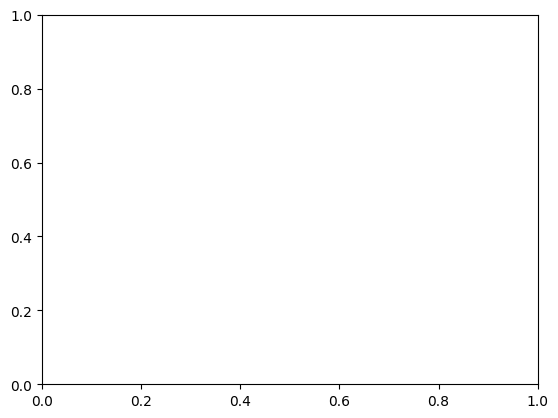

In [72]:
from shapely.geometry import Polygon

rf = RandomForestClassifier()

rf.fit(X_train, y_train)

# Calculate the feature importances
feature_importances = rf.feature_importances_

# Create a polygon for each feature
polygons = []
for i in range(len(feature_names)):
  points = feature_importances.reshape(-1, 2)
  polygons.append(Polygon(points))

# Plot the data and the polygons
fig, ax = plt.subplots()
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='cool')
for polygon in polygons:
  ax.plot(*polygon.exterior.xy, color='black')
ax.axis('equal')
plt.show()

## Visualize with lime


In [68]:
explainer = lime.lime_tabular.LimeTabularExplainer(
    X_train, feature_names=feature_names, class_names=["0", "1"], mode='classification'
)

# Select an instance for interpretation
instance_index = 1
instance = X_test[instance_index]
true_label = y_test[instance_index]

# Generate local explanation using LIME
exp = explainer.explain_instance(instance, tuned_model.predict_proba, num_features=len(feature_names), labels=[0, 1])

# Visualize feature importances
fig = exp.as_pyplot_figure()
plt.title(f"Feature Importances for Instance {instance_index}\nTrue Label: {true_label}")
plt.tight_layout()
plt.show()

InvalidIndexError: (slice(None, None, None), 0)

# 4. SVM


In [ ]:
from sklearn.svm import SVC

svc = SVC()

svc.fit(X_train, y_train)

y_pred_train = svc.predict(X_train)
y_pred_dev = svc.predict(X_dev)

print_eval_scores(y_pred_train, y_pred_dev, y_train, y_dev)

## Hyper-parameter tuning


In [ ]:
svc = SVC()

param_grid = {
    "C": [i for i in range(0.1, 10, 0.1)],
    "kernel": ["linear", "poly", "rbf", "sigmoid"],
    "degree": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "gamma": ["scale", "auto"],
    "coef0": [0.0, 0.1, 0.5, 1.0, 2.0],
    "shrinking": [True, False],
    "probability": [True, False],
    "tol": [0.001, 0.01, 0.1, 1.0],
    "cache_size": [200, 500, 1000],
    "class_weight": ["balanced", None],
}

tuned_model = tune_by_RandomizedSearchCV(svc, param_grid, X_train, y_train)

y_pred_train = tuned_model.predict(X_train)
y_pred_dev = tuned_model.predict(X_dev)

print_eval_scores(y_pred_train, y_pred_dev, y_train, y_dev)